In [10]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer, StandardScaler
from math import sqrt

In [11]:
%matplotlib inline

In [12]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
dd = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", cnx)
print(dd)

                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [13]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [14]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

**Remove null values**

In [16]:
df.dropna(axis=0, inplace=True)

**Basics statistics of numerical values**

In [17]:
pd.set_option("display.precision", 2)

In [18]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,...,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00,180354.00
mean,91995.89,166822.13,137653.15,68.64,73.48,55.14,49.96,57.26,62.49,49.49,...,57.87,54.93,46.76,50.35,48.03,14.70,15.95,20.53,16.02,16.33
std,53092.66,52821.44,137599.74,7.03,6.58,17.25,19.04,16.48,14.17,18.25,...,15.15,15.56,21.23,21.50,21.59,16.84,15.84,21.14,16.07,17.19
min,1.00,2.00,2625.00,33.00,39.00,1.00,1.00,1.00,3.00,1.00,...,1.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00
25%,46074.25,156616.00,35451.00,64.00,69.00,45.00,34.00,49.00,57.00,35.00,...,49.00,45.00,25.00,29.00,25.00,7.00,8.00,8.00,8.00,8.00
50%,92003.50,183792.00,80291.00,69.00,74.00,59.00,53.00,60.00,65.00,52.00,...,60.00,57.00,50.00,56.00,53.00,10.00,11.00,12.00,11.00,11.00
75%,137935.75,200138.00,192841.00,73.00,78.00,68.00,65.00,68.00,72.00,64.00,...,69.00,67.00,66.00,69.00,67.00,13.00,15.00,15.00,15.00,15.00
max,183978.00,234141.00,750584.00,94.00,97.00,95.00,97.00,98.00,97.00,93.00,...,97.00,96.00,94.00,95.00,95.00,94.00,93.00,97.00,96.00,96.00


## Visual Analysis

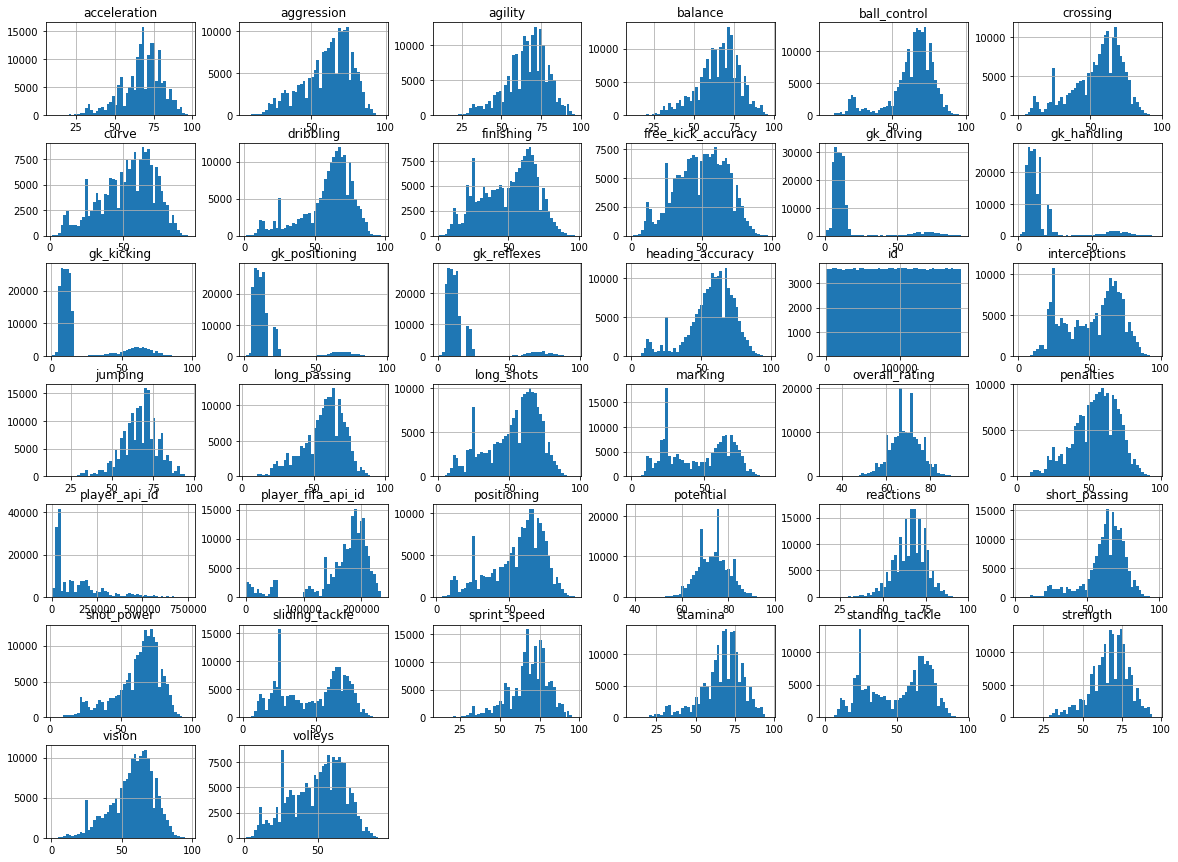

In [19]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [20]:
df.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.00e+00,3.74e-03,2.05e-03,-3.74e-03,8.37e-04,-0.02,-8.17e-03,-0.01,-6.70e-03,-6.92e-03,...,-7.93e-03,-1.18e-02,-1.03e-02,-1.25e-02,-1.11e-02,0.01,1.09e-02,8.76e-03,1.40e-02,1.47e-02
player_fifa_api_id,3.74e-03,1.00e+00,5.57e-01,-2.79e-01,-2.13e-02,-0.07,-2.98e-02,-0.10,-6.53e-02,-8.87e-02,...,-1.63e-01,-1.75e-01,-7.56e-02,-7.11e-02,-5.52e-02,-0.09,-1.39e-01,-2.48e-01,-1.41e-01,-1.32e-01
player_api_id,2.05e-03,5.57e-01,1.00e+00,-3.28e-01,1.06e-02,-0.11,-6.23e-02,-0.13,-9.02e-02,-1.31e-01,...,-1.88e-01,-1.62e-01,-8.98e-02,-8.67e-02,-7.36e-02,-0.07,-1.25e-01,-2.30e-01,-1.26e-01,-1.22e-01
overall_rating,-3.74e-03,-2.79e-01,-3.28e-01,1.00e+00,7.65e-01,0.36,3.30e-01,0.31,4.58e-01,3.62e-01,...,4.31e-01,3.93e-01,1.32e-01,1.64e-01,1.28e-01,0.03,6.72e-03,2.88e-02,8.03e-03,7.80e-03
potential,8.37e-04,-2.13e-02,1.06e-02,7.65e-01,1.00e+00,0.28,2.88e-01,0.21,3.83e-01,3.02e-01,...,3.79e-01,3.15e-01,5.41e-02,8.21e-02,6.33e-02,-0.01,5.86e-03,9.23e-02,4.47e-03,4.94e-03
crossing,-2.02e-02,-6.56e-02,-1.13e-01,3.57e-01,2.77e-01,1.00,5.77e-01,0.37,7.90e-01,6.38e-01,...,6.94e-01,5.74e-01,2.35e-01,2.85e-01,2.75e-01,-0.60,-5.96e-01,-3.57e-01,-5.98e-01,-6.02e-01
finishing,-8.17e-03,-2.98e-02,-6.23e-02,3.30e-01,2.88e-01,0.58,1.00e+00,0.37,5.80e-01,8.51e-01,...,6.52e-01,7.26e-01,-2.85e-01,-2.30e-01,-2.62e-01,-0.48,-4.65e-01,-2.92e-01,-4.71e-01,-4.73e-01
heading_accuracy,-1.18e-02,-1.04e-01,-1.30e-01,3.13e-01,2.06e-01,0.37,3.73e-01,1.00,5.48e-01,3.91e-01,...,3.36e-01,4.31e-01,4.61e-01,4.80e-01,4.41e-01,-0.67,-6.49e-01,-4.03e-01,-6.49e-01,-6.52e-01
short_passing,-6.70e-03,-6.53e-02,-9.02e-02,4.58e-01,3.83e-01,0.79,5.80e-01,0.55,1.00e+00,6.40e-01,...,7.66e-01,6.13e-01,3.50e-01,4.15e-01,3.80e-01,-0.69,-6.90e-01,-4.23e-01,-6.91e-01,-6.93e-01
volleys,-6.92e-03,-8.87e-02,-1.31e-01,3.62e-01,3.02e-01,0.64,8.51e-01,0.39,6.40e-01,1.00e+00,...,6.91e-01,7.13e-01,-1.70e-01,-1.08e-01,-1.28e-01,-0.51,-4.86e-01,-2.79e-01,-4.90e-01,-4.92e-01


In [21]:
y = df.pop('overall_rating')

#calculat missing data

In [22]:
y.isnull().values.sum()

0

In [23]:
y.describe()

count    180354.00
mean         68.64
std           7.03
min          33.00
25%          64.00
50%          69.00
75%          73.00
max          94.00
Name: overall_rating, dtype: float64

(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.3000e+01, 9.2000e+01,
        1.3700e+02, 2.7800e+02, 5.1000e+02, 1.2280e+03, 1.7900e+03,
        2.5000e+03, 3.9630e+03, 6.0410e+03, 9.4210e+03, 1.3460e+04,
        1.8012e+04, 2.0027e+04, 2.0550e+04, 1.9134e+04, 1.8569e+04,
        1.5750e+04, 1.1129e+04, 7.4480e+03, 4.8930e+03, 2.8050e+03,
        1.4350e+03, 7.4100e+02, 2.2300e+02, 8.3000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <a list of 30 Patch objects>)

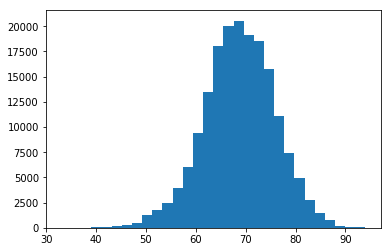

In [24]:
plt.hist(y, 30, range=(33, 94))

In [25]:
y.isnull().values.sum()

0

In [26]:
y.isnull().values.any()

False

In [28]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [29]:
for col in df.columns:
    unique_cat = len(df[col].unique())
    print("{col}\t\t\t{unique_cat}\t\t\t{typ}".format(col=col, unique_cat=unique_cat, typ=df[col].dtype))

id			180354			int64
player_fifa_api_id			10410			int64
player_api_id			10410			int64
date			197			object
potential			56			float64
preferred_foot			2			object
attacking_work_rate			8			object
defensive_work_rate			18			object
crossing			95			float64
finishing			97			float64
heading_accuracy			96			float64
short_passing			95			float64
volleys			93			float64
dribbling			97			float64
curve			92			float64
free_kick_accuracy			97			float64
long_passing			95			float64
ball_control			93			float64
acceleration			86			float64
sprint_speed			85			float64
agility			81			float64
reactions			78			float64
balance			81			float64
shot_power			96			float64
jumping			79			float64
stamina			84			float64
strength			82			float64
long_shots			96			float64
aggression			91			float64
interceptions			96			float64
positioning			94			float64
vision			97			float64
penalties			94			float64
marking			94			float64
standing_tackle			95			float64
sliding_tackle			94			float64
gk_diving			93			float64
gk_handling			89			

## Train and Test Split

**One Hot Encoding**

One Hot Encoding is the process of splitting categorical levels to multiple columns

In [30]:
dummy_df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
dummy_df.head()

,id,player_fifa_api_id,player_api_id,date,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,66.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
dummy_df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes',
       'preferred_foot_left', 'preferred_foot_right',
       'attacking_work_rate_None', 'attacking_work_rate_high',
       'attacking_work_rate_le', 'attacking_work_rate_low',
       'attacking_work_rate_medium', 'attacking_work_rate_norm',
       'attacking_work_rate_stoc', 'attacking_work_rate_y',
       'defensive_work_rate_0', 'defensive_work_rate_1',
       'defensive_work_rate_2', 'defensive_work_r

In [32]:
x  = dummy_df.drop(['id', 'date'], axis=1)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [34]:
print(x_train.shape)
print(y_train.shape)

(135265, 64)
(135265,)


In [35]:
print(x_test.shape)
print(y_test.shape)

(45089, 64)
(45089,)


## Fitting Regression Model

### Using StatsModel

In [38]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
model = sm.OLS(y_train, x_train).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.464e+04
Date:                Thu, 02 Aug 2018   Prob (F-statistic):               0.00
Time:                        10:30:48   Log-Likelihood:            -3.2225e+05
No. Observations:              135265   AIC:                         6.446e+05
Df Residuals:                  135207   BIC:                         6.452e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1074      0.079      1.363      0.173      -0.047       0.262
player_fifa_api_id          -8.65e-06   1.76e-07    -49.099      0.000   -8.99e-06    -8.3e-06
player_api_id              -6.397e-06   7.08e-08    -90.307      0.000   -6.54e-06   -6.26e-06
potential                      0.4473      0.002    264.995      0.000       0.444       0.451
crossing                       0.0067      0.001      7.192      0.000       0.005       0.008
finishing                      0.0150      0.001     14.930      0.000       0.013       0.017
heading_accuracy               0.0553      0.001     61.700      0.000       0.054       0.057
short_passing                  0.0575      0.001     38.338      0.000       0.055       0.060
volleys                       -0.0072      0.001     -7.951      0.000      -0.009      -0.005
dribbling                      0.0091      0.001      7.101      0.000       0.007       0.012
curve                          0.0117      0.001     13.341      0.000       0.010       0.013
free_kick_accuracy             0.0081      0.001     10.473      0.000       0.007       0.010
long_passing                   0.0104      0.001     10.118      0.000       0.008       0.012
ball_control                   0.1126      0.002     64.888      0.000       0.109       0.116
acceleration                   0.0123      0.002      8.181      0.000       0.009       0.015
sprint_speed                   0.0151      0.001     10.618      0.000       0.012       0.018
agility                       -0.0111      0.001     -9.976      0.000      -0.013      -0.009
reactions                      0.1755      0.001    145.573      0.000       0.173       0.178
balance                        0.0057      0.001      6.609      0.000       0.004       0.007
shot_power                     0.0141      0.001     14.780      0.000       0.012       0.016
jumping                        0.0112      0.001     14.167      0.000       0.010       0.013
stamina                       -0.0025      0.001     -2.792      0.005      -0.004      -0.001
strength                       0.0514      0.001     55.998      0.000       0.050       0.053
long_shots                    -0.0117      0.001    -11.738      0.000      -0.014      -0.010
aggression                     0.0102      0.001     13.579      0.000       0.009       0.012
interceptions                  0.0024      0.001      2.971      0.003       0.001       0.004
positioning                   -0.0061      0.001     -7.087      0.000      -0.008      -0.004
vision                        -0.0181      0.001    -18.793      0.000      -0.020      -0.016
penalties                      0.0079      0.001      9.702      0.000       0.006       0.010
marking                        0.0263      

In [41]:
lm = LinearRegression()

In [42]:
x_train.values

array([[1.00000e+00, 1.91184e+05, 1.55638e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.09483e+05, 3.52860e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.00111e+05, 2.99514e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 1.99561e+05, 2.13486e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.02182e+05, 6.67530e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.81268e+05, 1.10520e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [43]:
model = lm.fit(x_train.values, y_train.values)

In [44]:
model.coef_

array([ 1.22526382e-13, -8.64960036e-06, -6.39727014e-06,  4.47293620e-01,
        6.67504785e-03,  1.49743507e-02,  5.53027875e-02,  5.74695370e-02,
       -7.15414754e-03,  9.07838795e-03,  1.16784402e-02,  8.13605630e-03,
        1.03987495e-02,  1.12592796e-01,  1.22886751e-02,  1.51091023e-02,
       -1.10563137e-02,  1.75546632e-01,  5.66950011e-03,  1.40988389e-02,
        1.12318592e-02, -2.51002028e-03,  5.13947481e-02, -1.16877309e-02,
        1.02016995e-02,  2.39591402e-03, -6.11462915e-03, -1.80698692e-02,
        7.94147220e-03,  2.63481528e-02,  8.29275946e-03, -1.89898277e-02,
        1.57290400e-01,  2.51566595e-02, -4.55695405e-02,  4.81446517e-02,
        2.01448951e-02,  5.71791070e-03, -5.71791070e-03,  1.52830384e-01,
        3.65954361e-01, -7.22904105e-01,  1.20138794e+00,  2.17133463e-01,
       -2.37959535e-01, -8.95079729e-01, -8.13627790e-02,  4.62151223e-01,
        1.00915870e+00, -7.55309958e-02,  4.72006465e-01, -6.39453152e-01,
       -1.82619743e-01, -

In [45]:
model.intercept_

0.18210895755223078

In [47]:
model.score(x_train, y_train)

0.8605584969815303

In [49]:
model.score(x_test, y_test)

0.8613105730678781

## Evaluate Model Performance

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
import math

In [52]:
train_pred_y = model.predict(x_train)

In [53]:
test_pred_y = model.predict(x_test)

In [54]:
print('RMSE Train', math.sqrt(mean_squared_error(train_pred_y, y_train)))
print('RMSE Test' ,math.sqrt(mean_squared_error(test_pred_y, y_test)))

RMSE Train 2.6205972665368615
RMSE Test 2.6282392268851877


In [55]:
train_pred_y.shape

(135265,)

In [56]:
y_train.shape

(135265,)

In [61]:
#df.overall_rating.mean()

In [62]:
import matplotlib.pyplot as plt

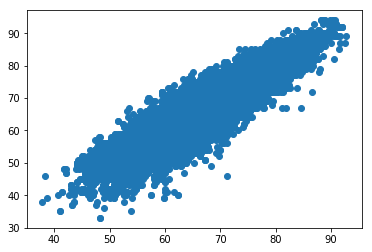

In [63]:
plt.scatter(train_pred_y, y_train)

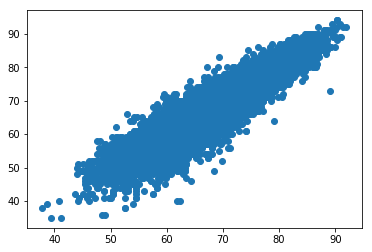

In [64]:
plt.scatter(test_pred_y, y_test)

(array([1.8000e+01, 5.3000e+01, 2.1000e+02, 1.2810e+03, 6.3430e+03,
        2.1483e+04, 4.1794e+04, 3.7953e+04, 1.7126e+04, 5.9400e+03,
        1.9890e+03, 7.0000e+02, 2.0300e+02, 1.1800e+02, 2.9000e+01,
        1.0000e+01, 8.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([-13.48731138, -11.55446277,  -9.62161416,  -7.68876555,
         -5.75591694,  -3.82306833,  -1.89021971,   0.0426289 ,
          1.97547751,   3.90832612,   5.84117473,   7.77402334,
          9.70687195,  11.63972056,  13.57256918,  15.50541779,
         17.4382664 ,  19.37111501,  21.30396362,  23.23681223,
         25.16966084]),
 <a list of 20 Patch objects>)

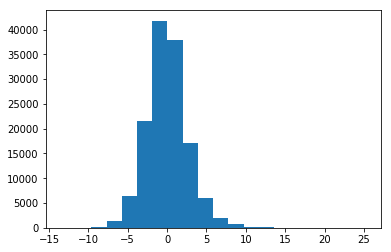

In [65]:
plt.hist(train_pred_y - y_train, bins=20)

(array([5.0000e+00, 1.8000e+01, 2.9000e+01, 2.2100e+02, 1.0070e+03,
        3.7760e+03, 9.7480e+03, 1.3837e+04, 9.8540e+03, 4.1960e+03,
        1.5310e+03, 5.0300e+02, 2.1900e+02, 6.9000e+01, 4.6000e+01,
        2.0000e+01, 5.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([-13.69047616, -11.88858345, -10.08669075,  -8.28479804,
         -6.48290534,  -4.68101263,  -2.87911993,  -1.07722722,
          0.72466548,   2.52655819,   4.32845089,   6.1303436 ,
          7.9322363 ,   9.73412901,  11.53602172,  13.33791442,
         15.13980713,  16.94169983,  18.74359254,  20.54548524,
         22.34737795]),
 <a list of 20 Patch objects>)

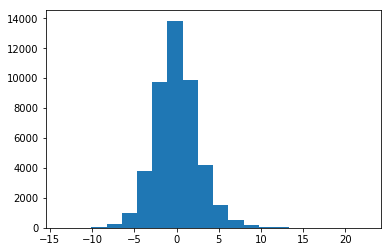

In [66]:
plt.hist(test_pred_y - y_test, bins=20)

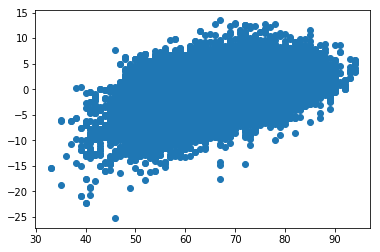

In [67]:
plt.scatter(y_train, y_train - train_pred_y)

In [68]:
pd.DataFrame.from_dict({'pred':train_pred_y, 'act':y_train})

,act,pred
117633,62.0,63.68
128844,59.0,64.54
148788,73.0,72.72
180932,63.0,63.92
48578,80.0,78.44
76573,68.0,72.39
179861,71.0,72.63
101667,64.0,63.32
7762,68.0,67.11
167403,78.0,76.36


## Cross Validation Scores

In [69]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, x, y, cv=10, scoring='neg_mean_squared_error')

print("Cross-validated scores:", scores)

Cross-validated scores: [-6.86155742 -6.77755472 -6.83510195 -7.174444   -6.83094163 -7.33651501
 -6.74859018 -6.89922284 -6.93133894 -6.78977552]


In [70]:
scores.std()

0.17998594391084294

In [71]:
scores.mean()

-6.918504219228812

## Tuning Model Performance


** Try to use below two tuning options separately and check if model performance improves **

** VIF To check for multi-collinearity **

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
#x = x.drop(['overall_rating'], axis=1)

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif.sort_values(by='VIF Factor' ,ascending=False)